# Week 8 - K-means Clustering and Principal Component Analysis

In the first part of this assignment, we implement the K-means clustering algorithm to a simple dataset, and then carry that out to compress an image. In the second part, we use PCA to find a low-dimensional representation of face-images.

## K-means Clustering

### Simple 2D Dataset

Let's first apply our K-means clustering to a simple 2D dataset to get it to work. 

#### Loading and Visualizing the Data

First, let's import the data and see how it looks.

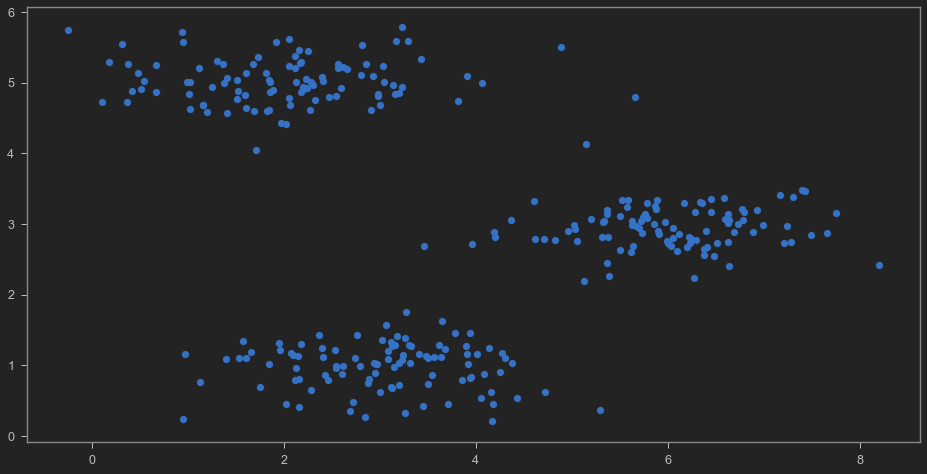

In [1]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings
warnings.filterwarnings('ignore')
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)

# Set the data path
dataDir = "./assignment/ex7/"
dataFile = "ex7data2.mat"
dataPath = dataDir+dataFile

# Load the data
data = loadmat(dataPath)
X = data['X']

# Plot the data
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[:,0],X[:,1], s=50, marker='o');

So we can clearly see three individual clusters here. So now let's try to separately identify them using K-means clustering with a cluster size of 3.

#### Cluster Assignments and Centroid Means

First, we will need functions to assign the cluster, compute the centroid means of the cluster, and then to iterate these steps to find the cluster centroids.

In [2]:
def kmeans_init_centroids(X,K):
    """Initialize the centroids to be random examples"""

    randIndex = np.random.permutation(X.shape[0])
    return X[randIndex[:K], :]

def find_closest_centroids(X,centroids):
    """Given a set of data and a set of centroids, find the datapoints that lie closest to each centroid"""
    
    # Get sizes
    m = X.shape[0]
    K = centroids.shape[0]
    
    # Initialize index and distance array
    distance = np.zeros((m,K))
    
    # Loop through classes and find distances of each sample to each centroid
    for k in range(K):
        
        # Get the distances
        distance[:,k] = np.sum((X-centroids[k,:])**2,axis=1)
    
    # Return the minimum distance for each sample
    return distance.argmin(axis=1)

def compute_centroids(X,ind,K):
    """Compute the centroid for each cluster"""
    
    # Get sizes and set arrays
    m,n = X.shape
    centroids = np.zeros((K,n))
    
    # Loop through each class and find the centroid
    for k in range(K):
        
        # Select only the indices that match the current cluster iteration
        select = np.where(ind==k)
        
        # Calculate the centroids
        centroids[k,:] = X[select,:].mean(axis=1)
        
    return centroids

def run_kmeans(X,centroids,maxIters=10,plotProgress=False):
    """Run the K means algorithm"""
    
    # Get number of clusters
    K = centroids.shape[0]
    
    # Loop through iterations and run the "closest centroid" and "centroid mean" functions
    for i in range(maxIters):
        
        # Get the closest centroids
        ind = find_closest_centroids(X,centroids)
        
        # Find the centroids
        centroids = compute_centroids(X,ind,K)
        
    return centroids,ind

#### Running K-means and Plotting Result

So now, let's run our functions and see how it performs! Note that we might just get lucky with an intial guess and the first and final results may match closely.

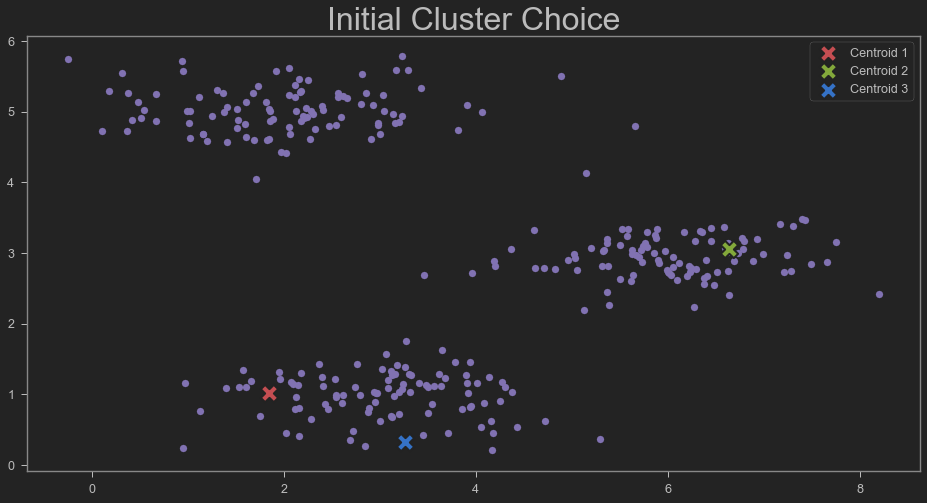

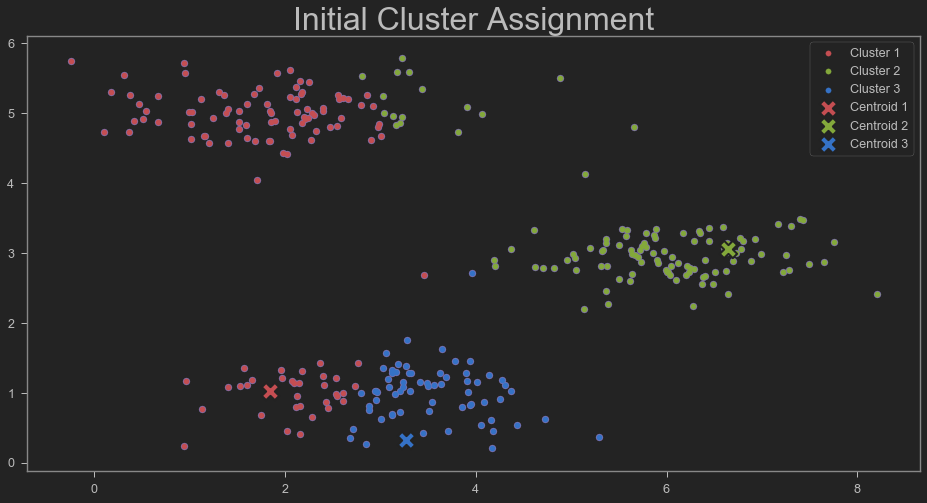

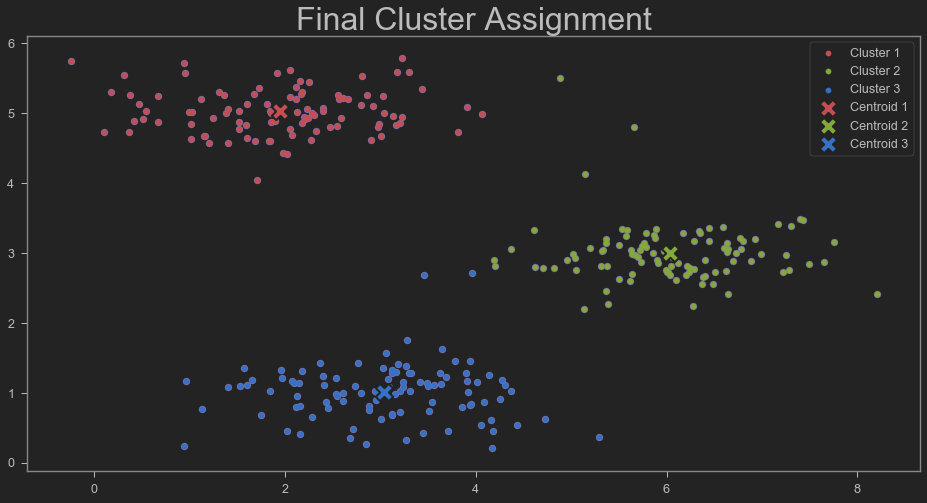

In [3]:
# Initialize cluster centroids randomly
centroids = kmeans_init_centroids(X,3)

# Plot our initial centroids
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[:,0],X[:,1], s=50, marker='o',color="m");
ax.scatter(centroids[0,0],centroids[0,1],s=300,linewidth=2,marker='X',color='r',label="Centroid 1",edgecolors='k');
ax.scatter(centroids[1,0],centroids[1,1],s=300,linewidth=2,marker='X',color='g',label="Centroid 2",edgecolors='k');
ax.scatter(centroids[2,0],centroids[2,1],s=300,linewidth=2,marker='X',color='b',label="Centroid 3",edgecolors='k');
ax.set_title("Initial Cluster Choice",fontsize=32)
ax.legend();

# Find those first closest clusters for the data
ind = find_closest_centroids(X,centroids)
cluster1 = X[np.where(ind==0)[0],:]
cluster2 = X[np.where(ind==1)[0],:]
cluster3 = X[np.where(ind==2)[0],:]

# Plot our initial results
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[:,0],X[:,1], s=50, marker='o',color="m");
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[0,0],centroids[0,1],s=300,linewidth=2,marker='X',color='r',label="Centroid 1",edgecolors='k');
ax.scatter(centroids[1,0],centroids[1,1],s=300,linewidth=2,marker='X',color='g',label="Centroid 2",edgecolors='k');
ax.scatter(centroids[2,0],centroids[2,1],s=300,linewidth=2,marker='X',color='b',label="Centroid 3",edgecolors='k');
ax.set_title("Initial Cluster Assignment",fontsize=32)
ax.legend();

# Now run the K-means algorithm
centroids,ind = run_kmeans(X,centroids)
cluster1 = X[np.where(ind==0)[0],:]
cluster2 = X[np.where(ind==1)[0],:]
cluster3 = X[np.where(ind==2)[0],:]

# Plot our initial centroids
fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[:,0],X[:,1], s=50, marker='o',color="m");
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')
ax.scatter(centroids[0,0],centroids[0,1],s=300,linewidth=2,marker='X',color='r',label="Centroid 1",edgecolors='k');
ax.scatter(centroids[1,0],centroids[1,1],s=300,linewidth=2,marker='X',color='g',label="Centroid 2",edgecolors='k');
ax.scatter(centroids[2,0],centroids[2,1],s=300,linewidth=2,marker='X',color='b',label="Centroid 3",edgecolors='k');
ax.set_title("Final Cluster Assignment",fontsize=32)
ax.legend();

### Image Compression

So now let's take an image that is composed of many colors (up to 256 x 256 x 256 for an 8-bit RGB image) and compress it down to 16 colors. We'll do this by clustering like colors together.

#### Load the Data and Plot

Let's first load up our image and display it. The image I'm using is from a reddit post by [u/cryptodesign](https://www.reddit.com/r/EarthPorn/comments/8l9xbl/milky_way_coming_out_of_an_erupting_volcano/).

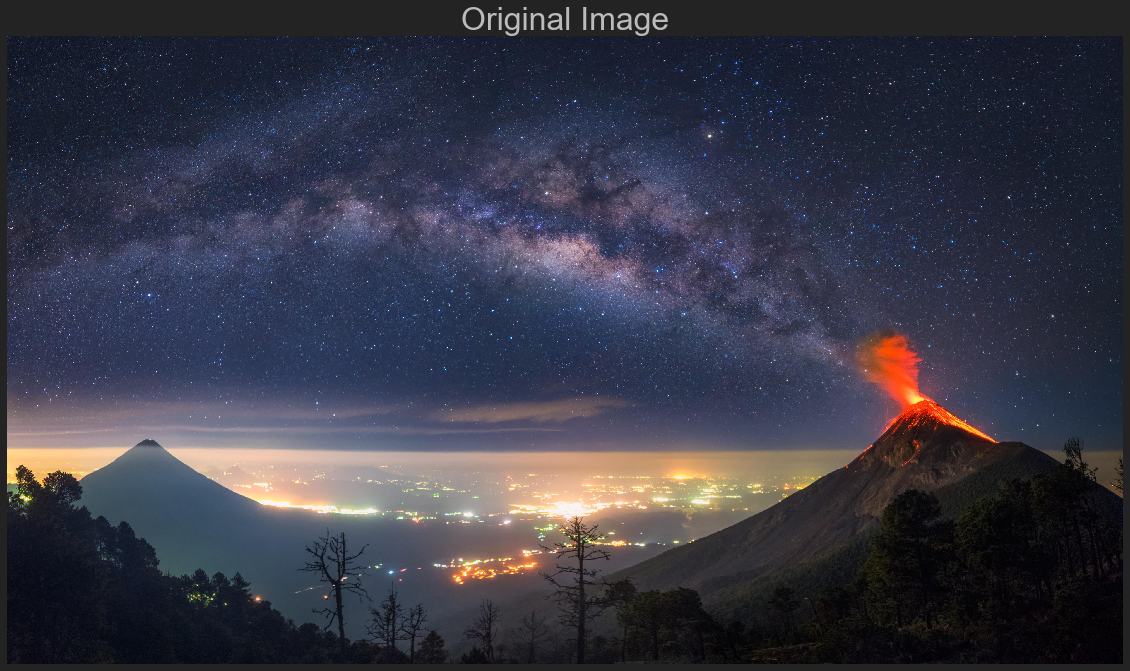

In [4]:
# Import module
import PIL

# Set data path
dataDir = "images/"
dataFile = "test.jpg"
dataPath = dataDir+dataFile

# Load the data
imageData = np.asarray(PIL.Image.open(dataPath))

# Plot the image
fig, ax = plt.subplots(figsize=(20,15));
ax.set_title("Original Image",fontsize=32)
ax.imshow(imageData);
ax.axis('off');

#### Pre-processing Data

So now, we need to do some pre-processing to the data so that we can run it through the K-means algorithm. Namely, we need to normalize the value ranges and then reshape the array.

In [5]:
# Normalize the image values
imageData = np.asarray(PIL.Image.open(dataPath))
imageData = imageData/255.

# Reshape the array
X = np.reshape(imageData,(imageData.shape[0]*imageData.shape[1],imageData.shape[2]))

#### Run the K-means Algorithm and Plot the Results

Lastly, let's run the algorithm in the image and see how it looks in the end! Note that larger images will take some time to process.

(-0.5, 3999.5, 2249.5, -0.5)

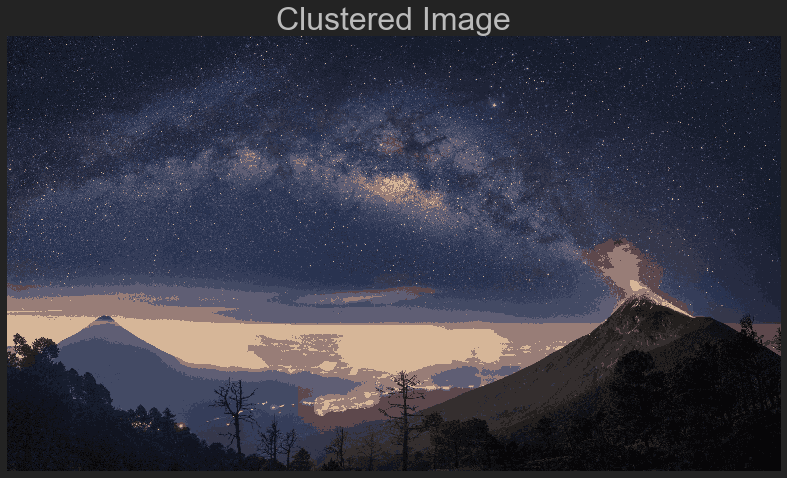

In [6]:
# Initialize cluster centroids randomly
centroids = kmeans_init_centroids(X,16)

# Run the K-means algorithm
centroids,ind = run_kmeans(X,centroids,10)

# Recover the final clustered data
XClustered = centroids[ind.astype(int),:]

# Reshape back to the original dimensions
XClustered = np.reshape(XClustered,(imageData.shape[0],imageData.shape[1],imageData.shape[2]))

# Plot the image
fig, ax = plt.subplots(figsize=(16,8));
ax.set_title("Clustered Image",fontsize=32)
ax.imshow(XClustered);
ax.axis('off')

And we can see here that we've lost a lot of the definition from our previous image by reducing the number of expressed colors to only show 16 individual colors.

## Principal Component Analysis

We'll work through a simple 2D dataset, and then we'll move on to run PCA on a dataset of faces.

### Simple 2D Dataset

Let's first work through our 2D sample dataset.  We'll project the 2D data to the best 1D array.

#### Loading and visualzing 

First load the data and plot it.

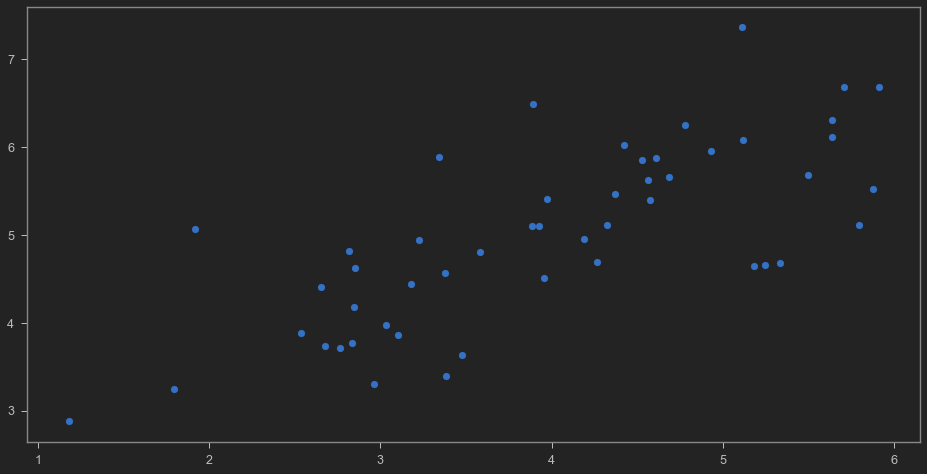

In [7]:
# Set the data path
dataDir = "./assignment/ex7/"
dataFile = "ex7data1.mat"
dataPath = dataDir+dataFile

# Load the data
data = loadmat(dataPath)
X = data['X']

fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[:, 0], X[:, 1]);

#### Performing the PCA

Now let's define some functions to run SVD to perform our PCA and then to project that data and finally to recover the original data.

In [8]:
def feature_normalize(X):
    """Normalize the data"""

    return (X-X.mean(axis=0))/X.std(axis=0)
    
def pca(X):
    """Perform the principal component analysis"""
    
    # Get the number of samples
    m = X.shape[0]
    
    # Compute the covariance matrix
    cov = (1.0/m)*(np.dot(X.T,X))
    
    # Perform SVD
    U, S, V = np.linalg.svd(cov)
    
    return U, S, V

def project_data(X,U,K):
    """Compute the reduced data representation by projecting to only top K eigenvectors"""
    
    return np.dot(X,U[:,:K])

def recover_data(Z,U,K):
    """Compute the recovered data by projecting back onto only the top K eigenvectors"""
    
    return np.dot(Z,U[:,:K].T)

And now let's run the PCA and plot our results.

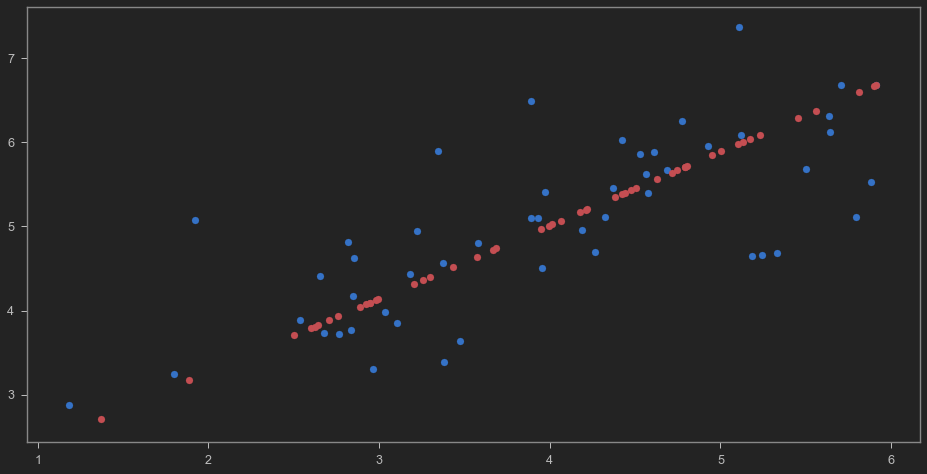

In [9]:
# Perform PCA, project the data from 2D to 1D, then get the recovered data
XNormalized = feature_normalize(X)
U,S,V = pca(XNormalized)
Z = project_data(XNormalized,U,1)
XRecovered = np.asarray(recover_data(Z,U,1))

# Un-normalize the data
XRecovered = (XRecovered*X.std(axis=0))+X.mean(axis=0)

fig, ax = plt.subplots(figsize=(16,8));
ax.scatter(X[:,0],X[:,1],color='b');
ax.scatter(XRecovered[:,0],XRecovered[:,1],color='r');

So we've collapsed our data from 2D onto a 1D line, where the first "principal component" is this line here. The second component would be the along the line orthogonal to this one which would be needed to represent the full 2D span of the data here.

### PCA on Face Images

Now let's perform PCA on the dataset of faces. 

#### Load and Display the Data

Let's first load and display the data. We'll make a function to create a grid of images and the load and plot the data.

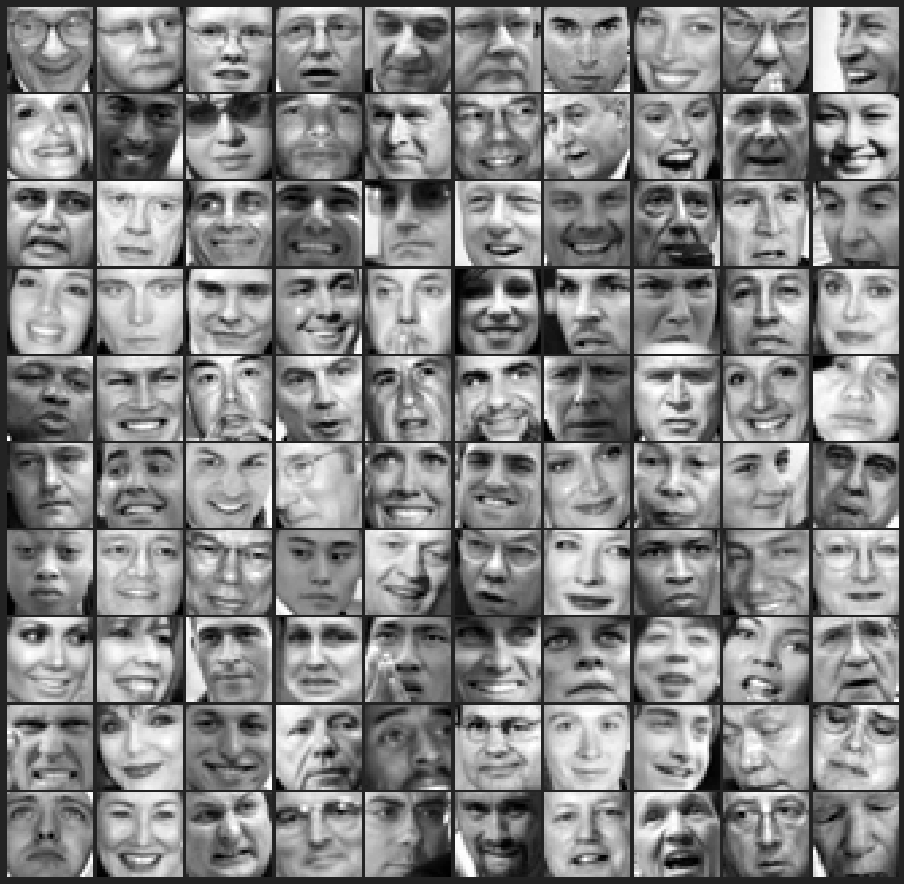

In [10]:
def display_data(X, example_width=None, figsize=(16,16),title=None):
    
    """Displays 2D data stored in X in a nice grid"""
    
    # Compute rows, cols
    if X.ndim == 2:
        m, n = X.shape
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promote to a 2 dimensional array
    else:
        raise IndexError('Input X should be 1 or 2 dimensional.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)

    # Compute number of items to display
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))

    fig, ax_array = plt.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)
    fig.suptitle(title,fontsize=32)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        ax.imshow(X[i].reshape(example_height, example_width, order='F'), cmap='gray')
        ax.axis('off')

# Set the data path
dataDir = "./assignment/ex7/"
dataFile = "ex7faces.mat"
dataPath = dataDir+dataFile

# Load the data
faces = loadmat(dataPath)
X = faces['X']

# Plot the first 100 images in the data
display_data(X[:100, :])

#### Perform PCA on Faces

To perform the PCA, we must first normalize the data. Then we can perform the same steps as in our simple 2D dataset to reduce the dimensionality of the data.

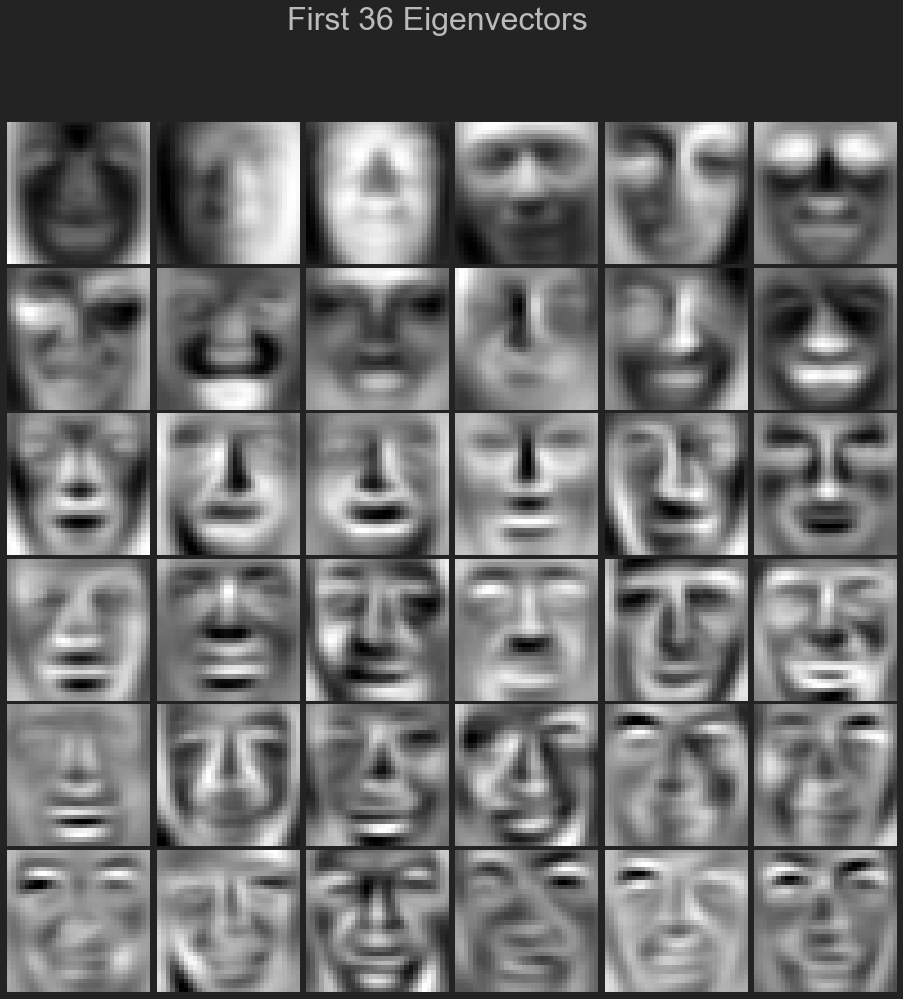

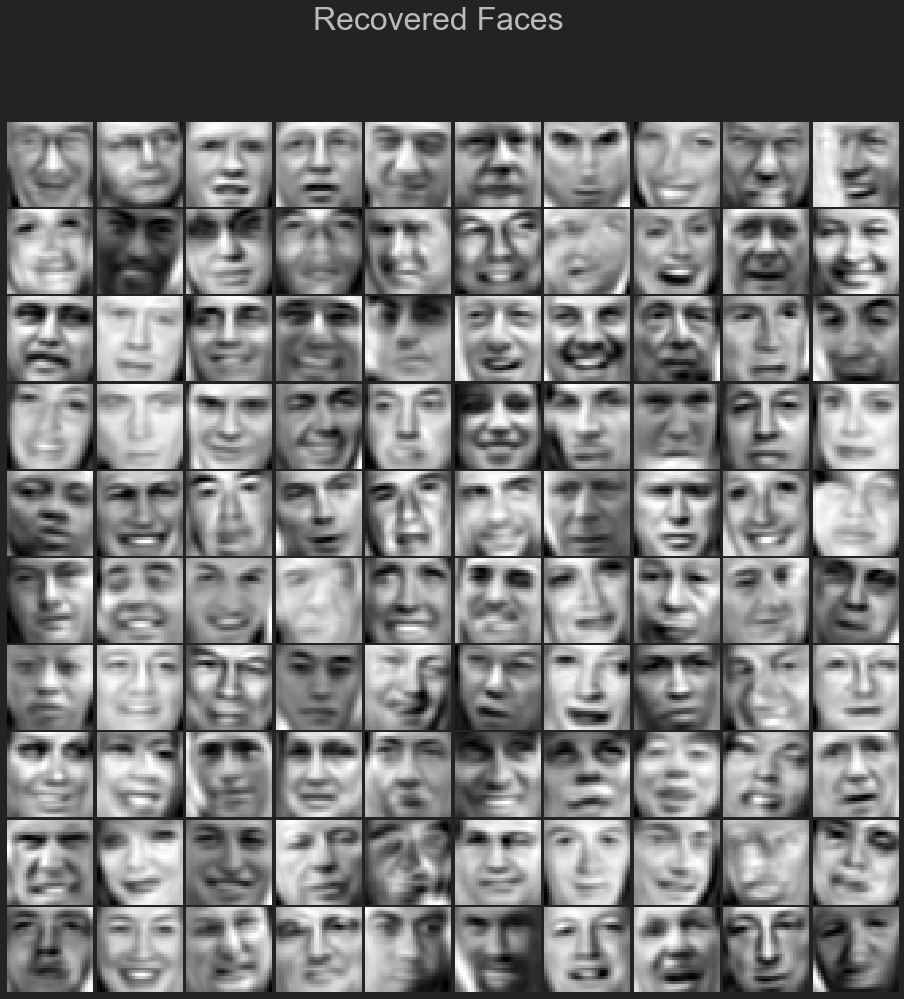

In [11]:
# Normalize data
XNormalized = feature_normalize(X)

# Run PCA
U,S,V = pca(XNormalized)

# Display the top 36 eigenvectors only
display_data(U[:,:36].T,title="First 36 Eigenvectors")

# Reduce the dimensionality down to 100 PCs
Z = project_data(XNormalized,U,100)

# Get the recovered images using the reduced dimensionality
XRecovered = recover_data(Z,U,100)

# Unnormalize the data
XRecovered = (XRecovered*X.std(axis=0))+X.mean(axis=0)

# Display the 
display_data(XRecovered[:100,:],title="Recovered Faces")

The first 100 eigenvectors did a fine job in some regards, and less so in others, but impressive nonetheless given that we've reduced our dimensions by over tenfold. Generally, the broad features of most faces are captured, but some of the finer details are lost with this reduction. Some of the faces are still quite recognizable, like U.S. Presidents George W. Bush or Bill Clinton. But some, like those at particular angles, with glasses on, or with other details on there face were much less recognizable with only 100 eigenvectors. 

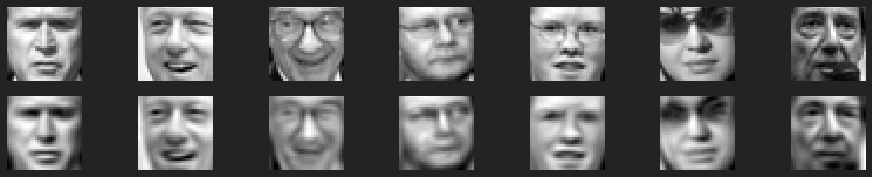

In [12]:
# Create plots for comparison between examples
fig, ax = plt.subplots(figsize=(16,3));
inds = [47,25,0,1,2,12,27]
count=1
for ind in inds:
    ax=plt.subplot(2,7,count)
    ax.imshow(np.reshape(X[ind,:], (32, 32)).T,cmap="gray");
    ax.axis('off');
    ax=plt.subplot(2,7,count+7)
    ax.imshow(np.reshape(XRecovered[ind,:], (32, 32)).T,cmap="gray");
    ax.axis('off');
    count=count+1